# 1. Pre-requisite:

#### Connecting to Google Drive for accessing the dataset

In [ ]:
# Installing libraries
# !pip install scikit-multilearn
# !pip install imbalanced-learn

In [ ]:
# Mouting drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Moving to the ML Project's drive folder
%cd /content/drive/My Drive/ML_Project/

/content/drive/My Drive/ML_Project


In [ ]:
# Verifying if we have the dataset in the drive folder
%ls

genres_v2.csv


#### Loading Libraries and Data

In [ ]:
# Importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from datetime import timedelta
from collections import Counter

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, KFold, cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from scipy import stats
from sklearn.metrics import make_scorer, confusion_matrix, classification_report, f1_score

from IPython.core.interactiveshell import InteractiveShell

from xgboost import XGBClassifier

pd.set_option('display.precision', 3)

In [ ]:
# Enables to set-up graphs in the notebook and also creating a standard template for seaborn or matplotlib plots
%matplotlib inline
sns.set(rc = {'figure.figsize': (8,5)})

In [ ]:
# Reading the dataset csv file
df = pd.read_csv('genres_v2.csv')
df.columns

<ipython-input-7-0f0ea425f71a>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [ ]:
# Printing the first 5 rows
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 20,Unnamed: 21
0,0.831,0.814,2,-7.364,1,0.420,0.060,1.340e-02,0.056,0.389,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.079,0.401,0.000e+00,0.118,0.124,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.062,0.014,4.140e-06,0.372,0.039,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.103,0.024,0.000e+00,0.114,0.175,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.293,0.217,0.000e+00,0.166,0.591,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


# 2. Data Exploration and Pre-processing

In [ ]:
# Shape of the dataset: 42305 rows and 22 columns
df.shape

(42305, 22)

In [ ]:
# Obtaining a statistical analysis for the numerical columns of the dataset
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 20
count,42305.000,4.230e+04,42305.000,42305.000,42305.000,42305.000,4.230e+04,42305.000,42305.000,42305.000,42305.000,42305.000,42305.000,20780.000
mean,0.639,7.625e-01,5.370,-6.465,0.549,0.137,9.616e-02,0.283,0.214,0.357,147.474,250865.847,3.973,10483.971
std,0.157,1.838e-01,3.666,2.941,0.498,0.126,1.708e-01,0.371,0.176,0.233,23.845,102957.714,0.268,6052.360
min,0.065,2.430e-04,0.000,-33.357,0.000,0.023,1.070e-06,0.000,0.011,0.019,57.967,25600.000,1.000,0.000
25%,0.524,6.320e-01,1.000,-8.161,0.000,0.049,1.730e-03,0.000,0.100,0.161,129.931,179840.000,4.000,5255.750
50%,0.646,8.030e-01,6.000,-6.234,1.000,0.075,1.640e-02,0.006,0.135,0.322,144.973,224760.000,4.000,10479.500
75%,0.766,9.230e-01,9.000,-4.513,1.000,0.193,1.070e-01,0.722,0.294,0.522,161.464,301133.000,4.000,15709.250
max,0.988,1.000e+00,11.000,3.148,1.000,0.946,9.880e-01,0.989,0.988,0.988,220.290,913052.000,5.000,20999.000


In [ ]:
# Obtaining an overview of each column's datatype and not-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Unnamed: 20'}>, <Axes: >, <Axes: >]],
      dtype=object)

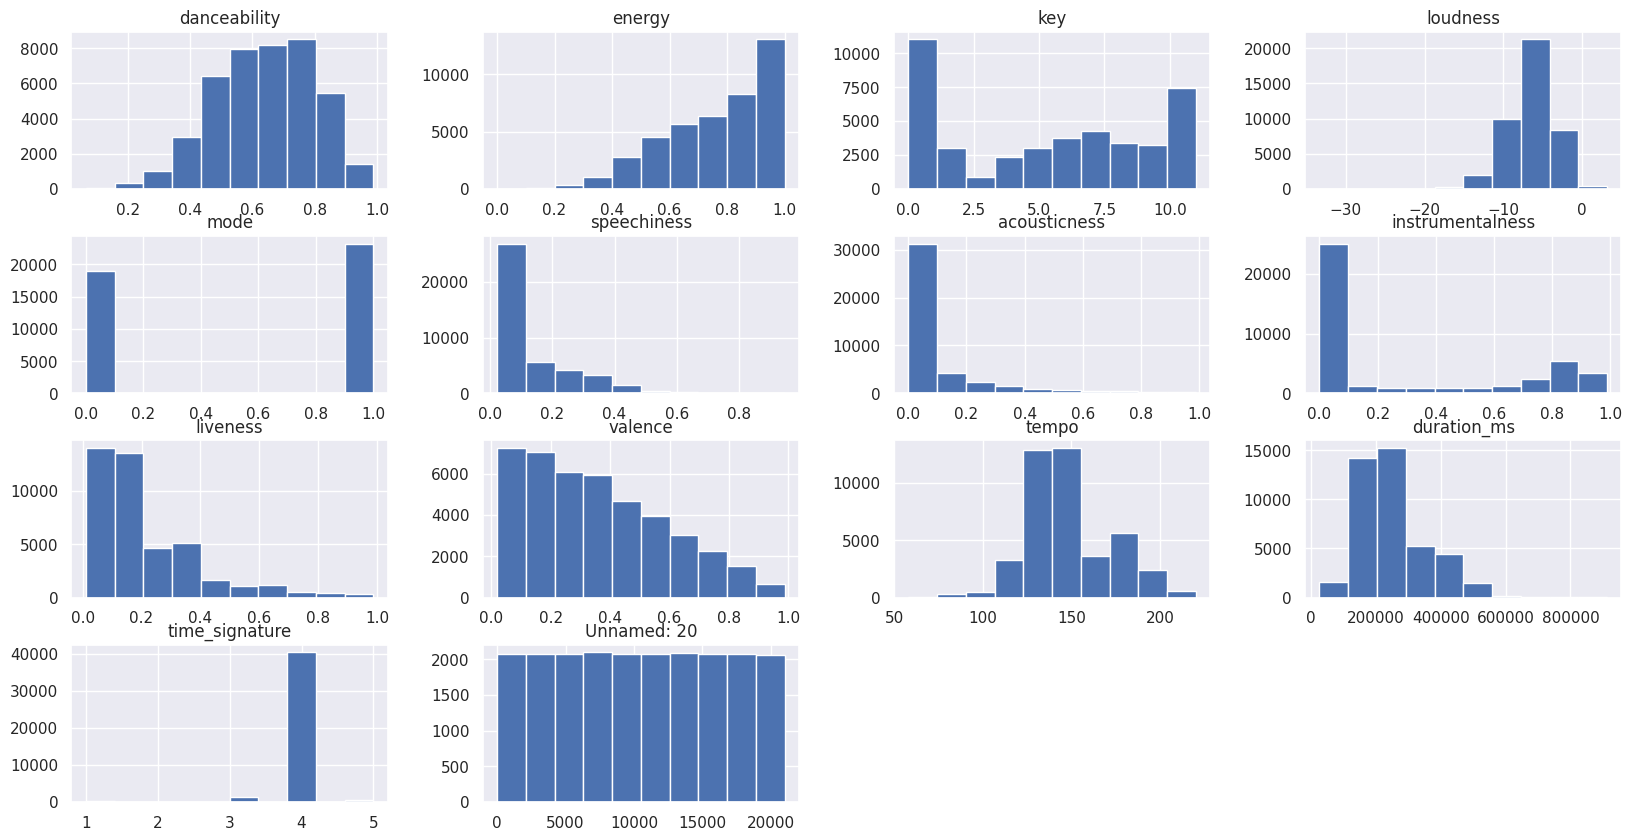

In [ ]:
# Plotting a histogram of all columns with dtype not as object
df.hist(figsize=(20,10))

#### Exploratory Data Analysis

##### Target column - genre

In [ ]:
# getting different classes of the target column
genreClasses = df.genre.unique()
genreClasses

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [ ]:
# checking the target column - multi-class distribution
df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [ ]:
# identify the percentage of each class of genre
print('Genre Class Percentage:')
df['genre'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

Genre Class Percentage:


Underground Rap    13.9%
Dark Trap          10.8%
Hiphop              7.2%
trance              7.1%
trap                7.1%
techhouse           7.0%
dnb                 7.0%
psytrance           7.0%
techno              7.0%
hardstyle           6.9%
RnB                 5.0%
Trap Metal          4.6%
Rap                 4.4%
Emo                 4.0%
Pop                 1.1%
Name: genre, dtype: object

In [ ]:
# printing the counts and percentage side by side
counts = df.genre.value_counts()
percs = df.genre.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# concatenate results into one DataFrame
temp = pd.concat([counts,percs], axis = 1, keys=['count', 'percentage'])
temp

,count,percentage
Underground Rap,5875,13.9%
Dark Trap,4578,10.8%
Hiphop,3028,7.2%
trance,2999,7.1%
trap,2987,7.1%
techhouse,2975,7.0%
dnb,2966,7.0%
psytrance,2961,7.0%
techno,2956,7.0%
hardstyle,2936,6.9%


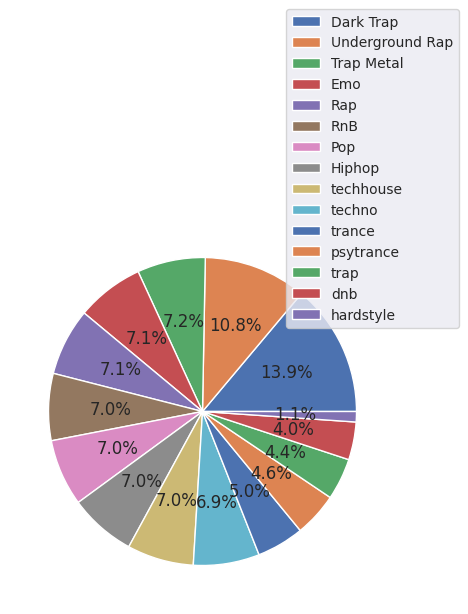

In [ ]:
# plotting the different genres classes
ax = df['genre'].value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%', labels = None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc = 'best', bbox_to_anchor=(0.7, 0.7), labels = genreClasses, fontsize='small')

As we can see, this is a nearly fair balance in distribution, we oversample the classes which are less representative in the later section.

Text(0.5, 1.0, 'Spotify: Different Genres')

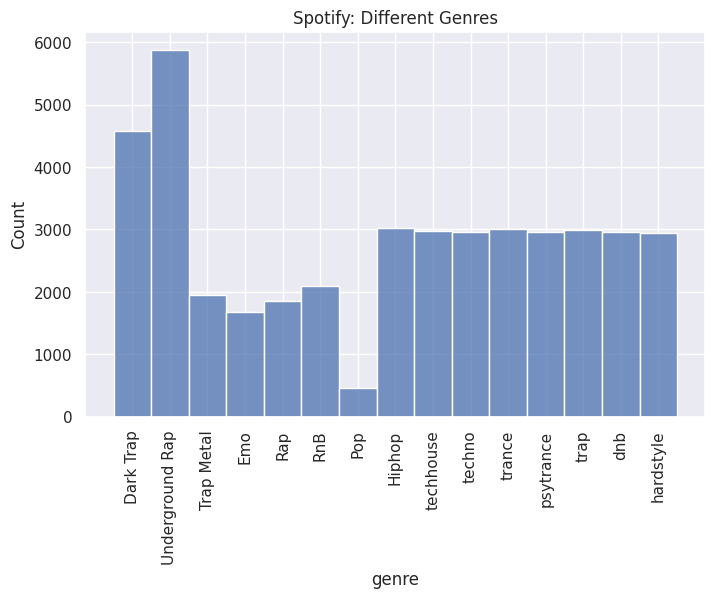

In [ ]:
# plotting the multi-class distribution in the form of a bar chart
sns.histplot(df['genre'])
plt.xticks(rotation = 90)
plt.title('Spotify: Different Genres')

##### Numerical columns

These include - danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms and Unnamed: 20.

Text(0.5, 1.0, 'Feature - Danceability')

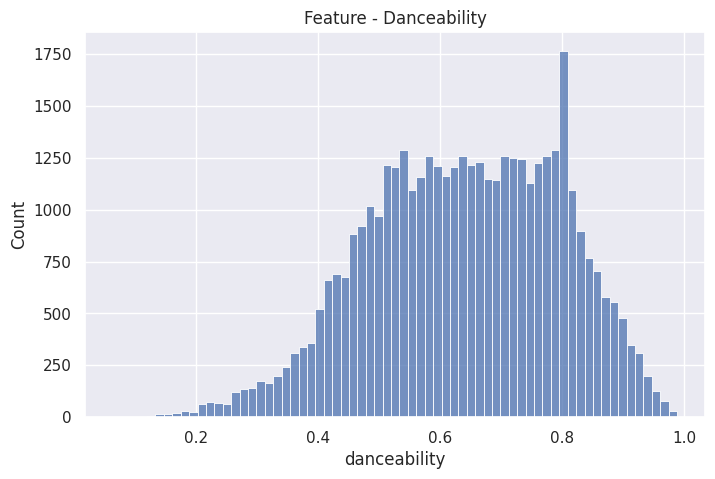

In [ ]:
# counting the tuples corresponding to the different danceability values
sns.histplot(df['danceability'])
plt.title('Feature - Danceability')

Text(0.5, 1.0, 'Feature - Energy')

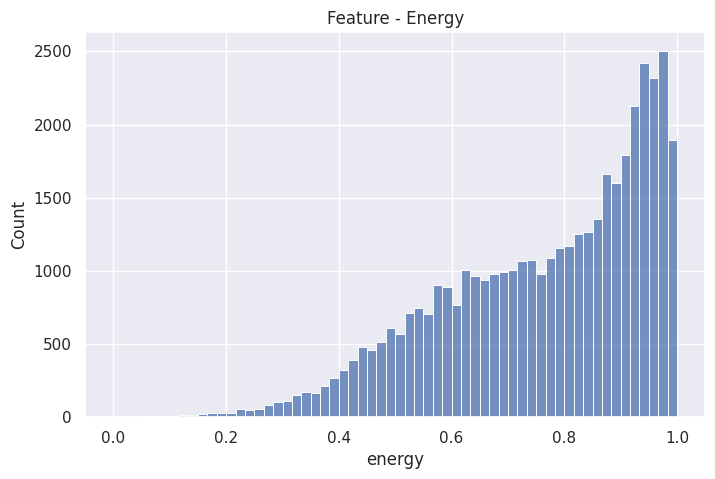

In [ ]:
# counting the tuples corresponding to the different energy values
sns.histplot(df['energy'])
plt.title('Feature - Energy')

Text(0.5, 1.0, 'Feature - Loudness')

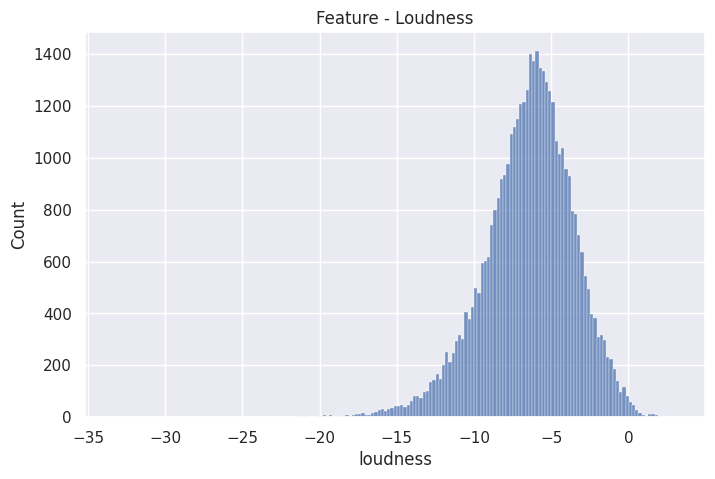

In [ ]:
# counting the tuples corresponding to the different loudness values
sns.histplot(df['loudness'])
plt.title('Feature - Loudness')

Text(0.5, 1.0, 'Feature - Speechiness')

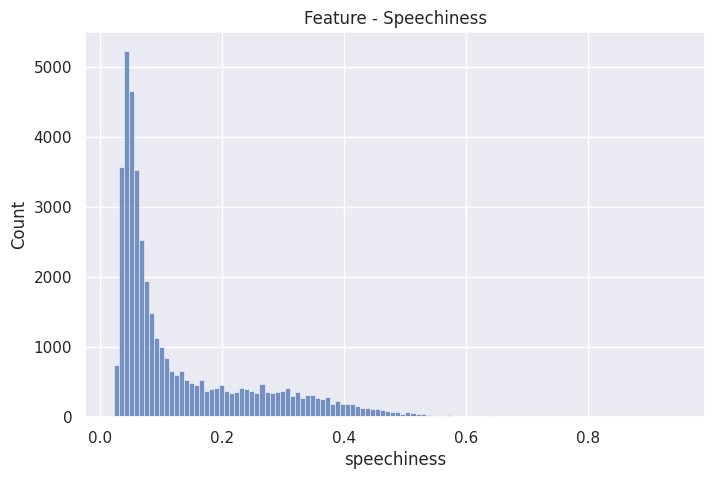

In [ ]:
# counting the tuples corresponding to the different speechiness values
sns.histplot(df['speechiness'])
plt.title('Feature - Speechiness')

Text(0.5, 1.0, 'Feature - Acousticness')

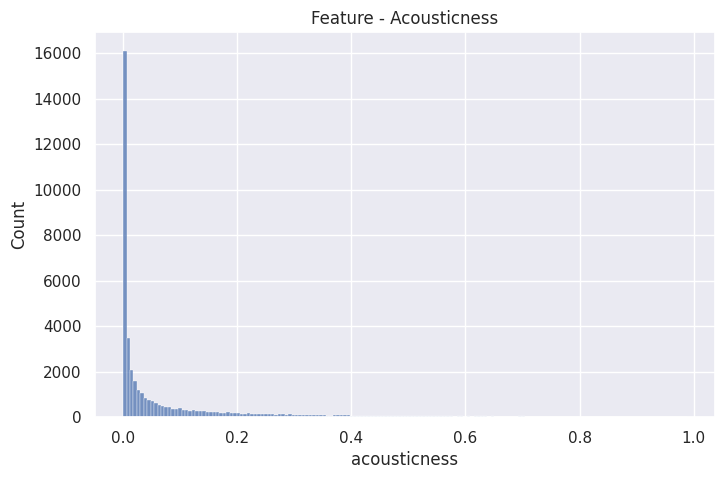

In [ ]:
# counting the tuples corresponding to the different acousticness values
sns.histplot(df['acousticness'])
plt.title('Feature - Acousticness')

Text(0.5, 1.0, 'Feature - Instrumentalness')

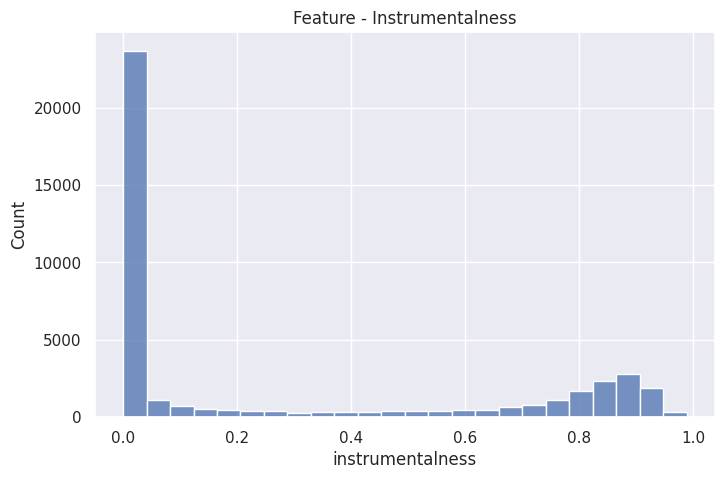

In [ ]:
# counting the tuples corresponding to the different instrumentalness values
sns.histplot(df['instrumentalness'])
plt.title('Feature - Instrumentalness')

Text(0.5, 1.0, 'Feature - Liveness')

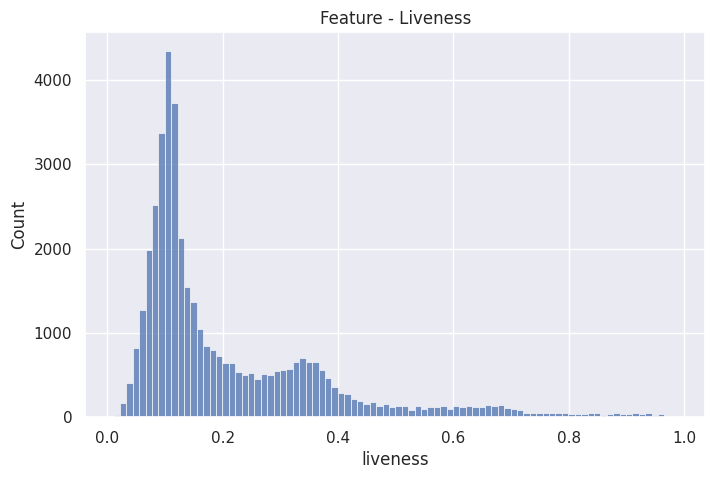

In [ ]:
# counting the tuples corresponding to the different liveness values
sns.histplot(df['liveness'])
plt.title('Feature - Liveness')

Text(0.5, 1.0, 'Feature - Valence')

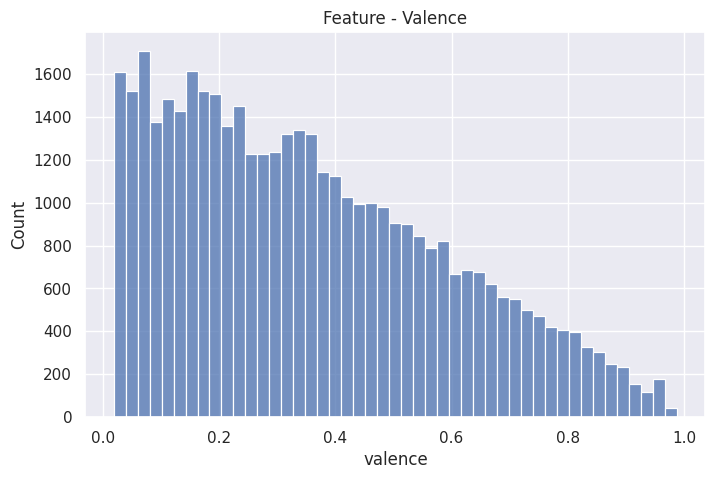

In [ ]:
# counting the tuples corresponding to the different valence values
sns.histplot(df['valence'])
plt.title('Feature - Valence')

Text(0.5, 1.0, 'Feature - Tempo')

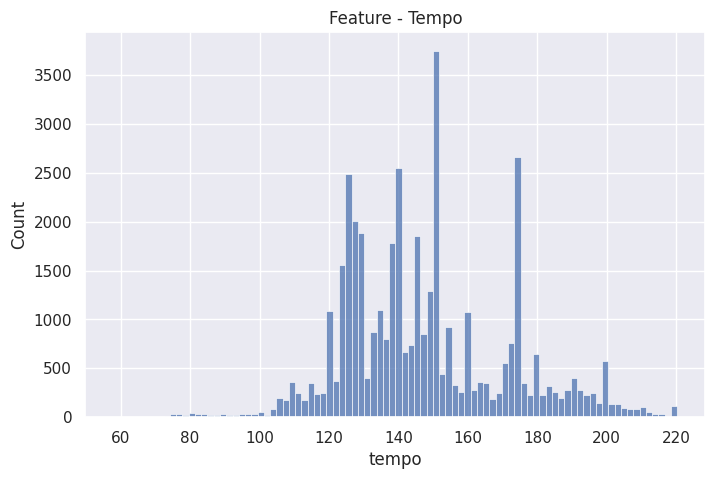

In [ ]:
# counting the tuples corresponding to the different tempo values
sns.histplot(df['tempo'])
plt.title('Feature - Tempo')

Text(0.5, 1.0, 'Feature - Duration in milliseconds')

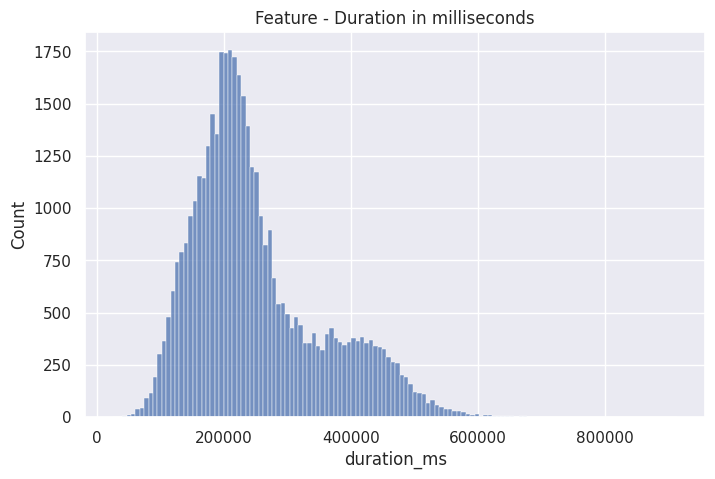

In [ ]:
# counting the tuples corresponding to the different duration_ms values
sns.histplot(df['duration_ms'])
plt.title('Feature - Duration in milliseconds')

Text(0.5, 1.0, 'Feature - Unnamed: 20')

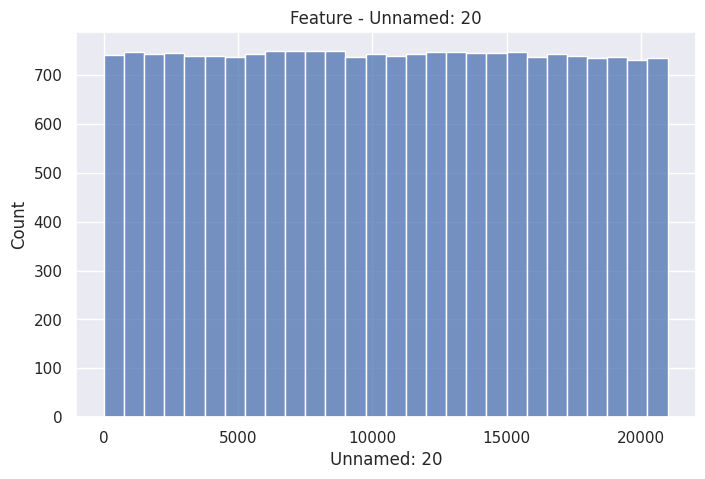

In [ ]:
# counting the tuples corresponding to the different Unnamed: 20 values
sns.histplot(df['Unnamed: 20'])
plt.title('Feature - Unnamed: 20')

Some observations from these numerical column plots:

* Danceability plot seems gaussian but is not exactly a gaussian distribution.
* No specific conclusion from energy plot.
* Loudness distribution seems gaussian.
* Speechiness somewhat represents a chi-square distribution. 
* Same goes for acousticness.
* Instrumentalness has more values as 0, representing more vocal tracks, which is true, as the count of Rap is 5875.
* Valence is linearly decreasing with most of its value belonging to low, i.e. negative energy - sad, depressed or angry.
* Tempo plot almost seems like a normal distribution.
* Duration_ms has really high values, which shall be catered in the section of feature extraction.
* No specific conclusion can be drawn from the plot of Unnamed: 20, the column is further investigated during pre-processing.



##### Categorical columns

These include - key, mode and time_signature.

Text(0.5, 1.0, 'Feature - Key')

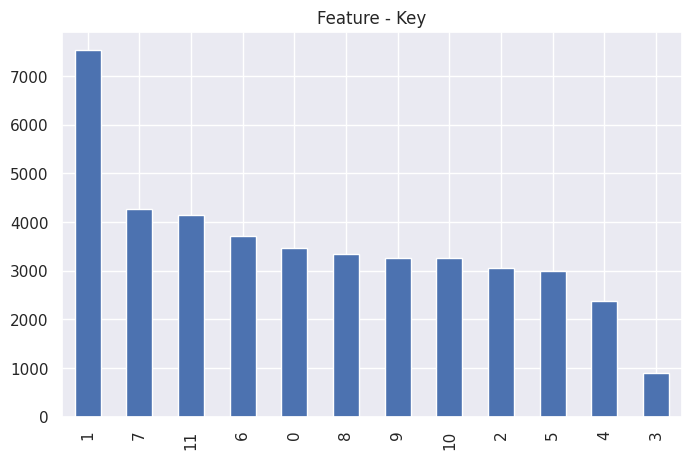

In [ ]:
# counting the tuples corresponding to the different key values
df['key'].value_counts().plot(kind='bar')
plt.title('Feature - Key')

Text(0.5, 1.0, 'Feature - Key')

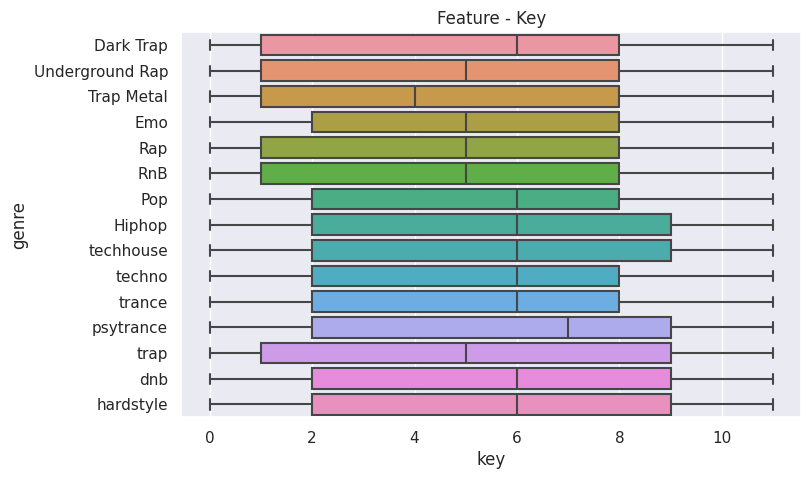

In [ ]:
sns.boxplot(x = 'key', y = 'genre', data = df)
plt.title('Feature - Key')

Text(0.5, 1.0, 'Feature - Mode')

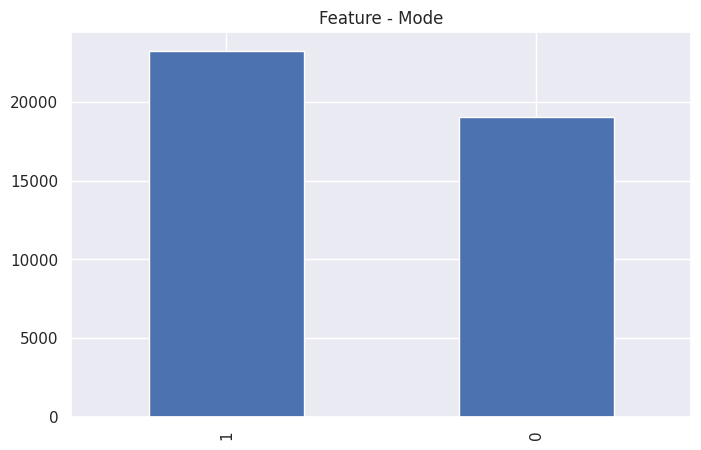

In [ ]:
# counting the tuples corresponding to the different mode values
df['mode'].value_counts().plot(kind='bar')
plt.title('Feature - Mode')

Text(0.5, 1.0, 'Feature - Mode')

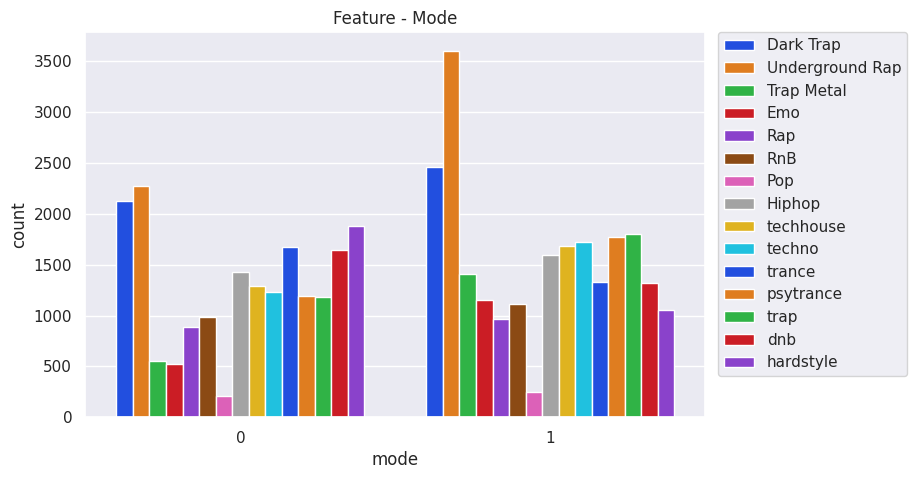

In [ ]:
# plotting the counts of each mode (0 and 1) against each genre
sns.countplot(x = 'mode', data = df, hue = 'genre', palette = 'bright')
plt.legend(bbox_to_anchor = (1.02, 1), borderaxespad = 0)
plt.title('Feature - Mode')

Text(0.5, 1.0, 'Feature - Time Signature')

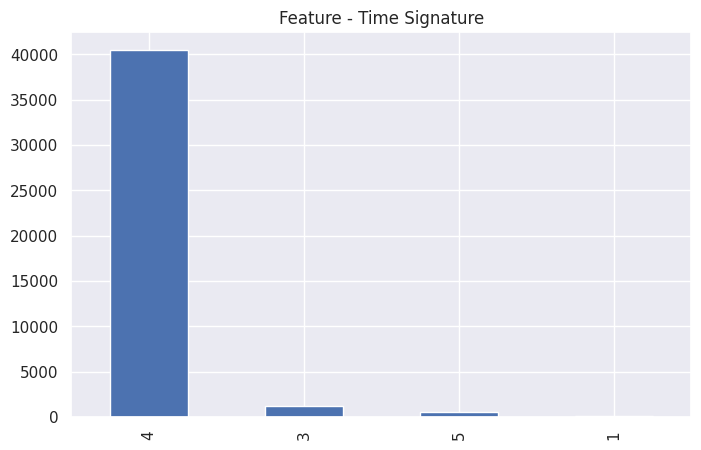

In [ ]:
# counting the tuples corresponding to the different time_signature values
df['time_signature'].value_counts().plot(kind='bar')
plt.title('Feature - Time Signature')

Text(0.5, 1.0, 'Feature - Time Signature')

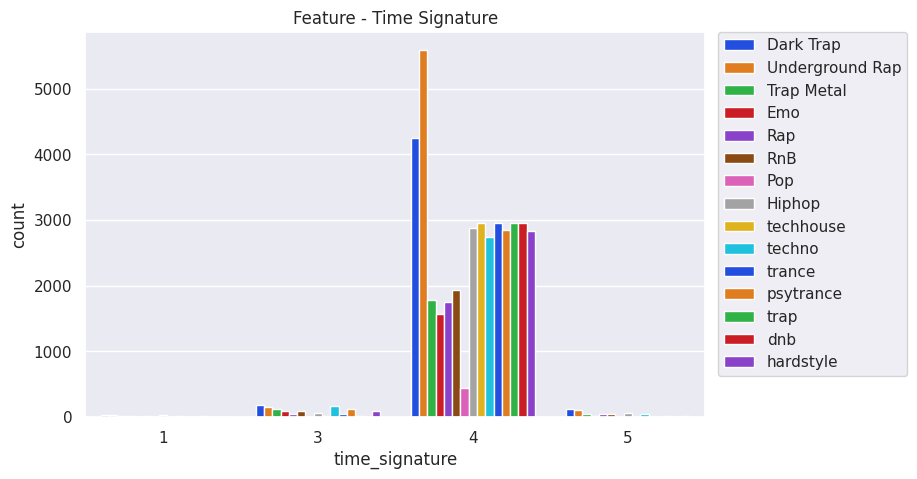

In [ ]:
# plotting the counts of each time_signature against each genre
sns.countplot(x = 'time_signature', data = df, hue = 'genre', palette = 'bright')
plt.legend(bbox_to_anchor = (1.02, 1), borderaxespad = 0)
plt.title('Feature - Time Signature')

There is no significant insight for the columns time_signature, mode and key from the plots. So we are choosing to explore these columns more in the further sections.

### Exploring the features further

Before, splitting the dataset into train-test, we will try to explore the non-numerical variables in the following section.

#### Unnamed: 21 & Unnamed: 20 columns

In [ ]:
# Obtaining the different categories / values of Unnamed: 21 column
df['Unnamed: 21'].value_counts()

Euphoric Hardstyle               1398
UKF Drum & Bass - All Uploads     907
Top Trance Songs EVER             771
I'm a fucking Headbanger          715
Dark Techno Rave                  680
                                 ... 
Trance List | TOP Trance           18
EDC 2020 Bass Pod                  16
Best New Techno - When We Dip      13
Trap & Bass 2020                   12
HALCYON's 808 BASEMENT             12
Name: Unnamed: 21, Length: 132, dtype: int64

When checking for the first category of Unnamed: 21 => Euphoric Hardstyle, we found out that the Genre Values under it are all hardstyle. 

In [ ]:
# Checking for the first category of Euphoric Hardstyle
euphoricHardstyle = df.loc[df['Unnamed: 21']=='Euphoric Hardstyle']
assert euphoricHardstyle['genre'].value_counts()[0] == euphoricHardstyle.shape[0]
assert euphoricHardstyle['song_name'].isna().sum() == euphoricHardstyle.shape[0]
euphoricHardstyle.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 20,Unnamed: 21
39369,0.628,0.889,5,-3.198,1,0.142,0.034,8.040e-04,0.136,0.200,...,6Cm8BkftC0RQBr1oE2RKS0,spotify:track:6Cm8BkftC0RQBr1oE2RKS0,https://api.spotify.com/v1/tracks/6Cm8BkftC0RQ...,https://api.spotify.com/v1/audio-analysis/6Cm8...,173005,4,hardstyle,NaN,18000.0,Euphoric Hardstyle
39372,0.333,0.865,8,-2.901,0,0.076,0.036,0.000e+00,0.133,0.277,...,6cjNMBHuFR5C1iSZuwPMMJ,spotify:track:6cjNMBHuFR5C1iSZuwPMMJ,https://api.spotify.com/v1/tracks/6cjNMBHuFR5C...,https://api.spotify.com/v1/audio-analysis/6cjN...,231452,4,hardstyle,NaN,18004.0,Euphoric Hardstyle
39373,0.552,0.947,1,-3.955,1,0.058,0.014,5.240e-06,0.200,0.213,...,2HwxQgavFbg5kHqDDmpTEF,spotify:track:2HwxQgavFbg5kHqDDmpTEF,https://api.spotify.com/v1/tracks/2HwxQgavFbg5...,https://api.spotify.com/v1/audio-analysis/2Hwx...,219915,4,hardstyle,NaN,18005.0,Euphoric Hardstyle
39374,0.518,0.971,11,-7.435,0,0.090,0.004,6.030e-01,0.805,0.225,...,1LKvVKWgsQuz17jrj7FKEK,spotify:track:1LKvVKWgsQuz17jrj7FKEK,https://api.spotify.com/v1/tracks/1LKvVKWgsQuz...,https://api.spotify.com/v1/audio-analysis/1LKv...,303160,4,hardstyle,NaN,18006.0,Euphoric Hardstyle
39377,0.490,0.861,11,-5.368,0,0.037,0.004,1.220e-05,0.651,0.462,...,2Q0JDDSAu3M0rffZZpCmqb,spotify:track:2Q0JDDSAu3M0rffZZpCmqb,https://api.spotify.com/v1/tracks/2Q0JDDSAu3M0...,https://api.spotify.com/v1/audio-analysis/2Q0J...,182432,4,hardstyle,NaN,18009.0,Euphoric Hardstyle


Since, the assertions pass through without throwing an error, it is true that for all Euphoric Hardstyle the genre is "hardstyle".

Some observations for this: all the values of song_name for this subset of data is null. Also, the genre for all of these songs is 'hardstyle'. 

Thus, we are replacing the song_name for this dataset with "Euphoric Hardstyle XXX" wherein XXX represents the row_number, to identify each song in this subset of data uniquely as well as retain the original dataset.


In [ ]:
euphoricHardstyle['song_name'] = euphoricHardstyle.apply(lambda row: 'Euphoric Hardstyle ' + str(row.name), axis = 1)
euphoricHardstyle.head()

<ipython-input-38-7ef9e4a482ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euphoricHardstyle['song_name'] = euphoricHardstyle.apply(lambda row: 'Euphoric Hardstyle ' + str(row.name), axis = 1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 20,Unnamed: 21
39369,0.628,0.889,5,-3.198,1,0.142,0.034,8.040e-04,0.136,0.200,...,6Cm8BkftC0RQBr1oE2RKS0,spotify:track:6Cm8BkftC0RQBr1oE2RKS0,https://api.spotify.com/v1/tracks/6Cm8BkftC0RQ...,https://api.spotify.com/v1/audio-analysis/6Cm8...,173005,4,hardstyle,Euphoric Hardstyle 39369,18000.0,Euphoric Hardstyle
39372,0.333,0.865,8,-2.901,0,0.076,0.036,0.000e+00,0.133,0.277,...,6cjNMBHuFR5C1iSZuwPMMJ,spotify:track:6cjNMBHuFR5C1iSZuwPMMJ,https://api.spotify.com/v1/tracks/6cjNMBHuFR5C...,https://api.spotify.com/v1/audio-analysis/6cjN...,231452,4,hardstyle,Euphoric Hardstyle 39372,18004.0,Euphoric Hardstyle
39373,0.552,0.947,1,-3.955,1,0.058,0.014,5.240e-06,0.200,0.213,...,2HwxQgavFbg5kHqDDmpTEF,spotify:track:2HwxQgavFbg5kHqDDmpTEF,https://api.spotify.com/v1/tracks/2HwxQgavFbg5...,https://api.spotify.com/v1/audio-analysis/2Hwx...,219915,4,hardstyle,Euphoric Hardstyle 39373,18005.0,Euphoric Hardstyle
39374,0.518,0.971,11,-7.435,0,0.090,0.004,6.030e-01,0.805,0.225,...,1LKvVKWgsQuz17jrj7FKEK,spotify:track:1LKvVKWgsQuz17jrj7FKEK,https://api.spotify.com/v1/tracks/1LKvVKWgsQuz...,https://api.spotify.com/v1/audio-analysis/1LKv...,303160,4,hardstyle,Euphoric Hardstyle 39374,18006.0,Euphoric Hardstyle
39377,0.490,0.861,11,-5.368,0,0.037,0.004,1.220e-05,0.651,0.462,...,2Q0JDDSAu3M0rffZZpCmqb,spotify:track:2Q0JDDSAu3M0rffZZpCmqb,https://api.spotify.com/v1/tracks/2Q0JDDSAu3M0...,https://api.spotify.com/v1/audio-analysis/2Q0J...,182432,4,hardstyle,Euphoric Hardstyle 39377,18009.0,Euphoric Hardstyle


In [ ]:
# UKF Drum & Bass - All Uploads
ukfDrumsAndBassAllUploads = df.loc[df['Unnamed: 21']=='UKF Drum & Bass - All Uploads']
assert ukfDrumsAndBassAllUploads['genre'].value_counts()[0] == ukfDrumsAndBassAllUploads.shape[0]
assert ukfDrumsAndBassAllUploads['song_name'].isna().sum() == ukfDrumsAndBassAllUploads.shape[0]

# Similar to the above observation, we do it for this category as well.
ukfDrumsAndBassAllUploads['song_name'] = ukfDrumsAndBassAllUploads.apply(lambda row: 'UKF Drum & Bass - All Uploads ' + str(row.name), axis = 1)
ukfDrumsAndBassAllUploads.head()

<ipython-input-39-603c39b868d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukfDrumsAndBassAllUploads['song_name'] = ukfDrumsAndBassAllUploads.apply(lambda row: 'UKF Drum & Bass - All Uploads ' + str(row.name), axis = 1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 20,Unnamed: 21
36411,0.585,0.964,0,-4.712,0,0.053,3.070e-05,0.696,0.052,0.592,...,31hRAtnRi8BsbeN6swmSxO,spotify:track:31hRAtnRi8BsbeN6swmSxO,https://api.spotify.com/v1/tracks/31hRAtnRi8Bs...,https://api.spotify.com/v1/audio-analysis/31hR...,394971,4,dnb,UKF Drum & Bass - All Uploads 36411,15008.0,UKF Drum & Bass - All Uploads
36420,0.443,0.932,6,-1.835,0,0.035,1.560e-03,0.712,0.198,0.075,...,7aKanhDfURIlRVJh4yTTB9,spotify:track:7aKanhDfURIlRVJh4yTTB9,https://api.spotify.com/v1/tracks/7aKanhDfURIl...,https://api.spotify.com/v1/audio-analysis/7aKa...,276037,4,dnb,UKF Drum & Bass - All Uploads 36420,15017.0,UKF Drum & Bass - All Uploads
36422,0.462,0.791,7,-3.584,1,0.048,9.070e-04,0.059,0.125,0.135,...,472snLlwbQMfNEuBx0FLrt,spotify:track:472snLlwbQMfNEuBx0FLrt,https://api.spotify.com/v1/tracks/472snLlwbQMf...,https://api.spotify.com/v1/audio-analysis/472s...,309024,4,dnb,UKF Drum & Bass - All Uploads 36422,15019.0,UKF Drum & Bass - All Uploads
36423,0.696,0.937,1,-1.629,1,0.189,4.040e-04,0.258,0.100,0.299,...,2ii2LFewEdGsY2et4KyXF5,spotify:track:2ii2LFewEdGsY2et4KyXF5,https://api.spotify.com/v1/tracks/2ii2LFewEdGs...,https://api.spotify.com/v1/audio-analysis/2ii2...,251929,4,dnb,UKF Drum & Bass - All Uploads 36423,15020.0,UKF Drum & Bass - All Uploads
36424,0.409,0.876,2,-4.612,0,0.046,7.200e-02,0.118,0.225,0.071,...,3GG6X47vnwgtMxejiMjOFK,spotify:track:3GG6X47vnwgtMxejiMjOFK,https://api.spotify.com/v1/tracks/3GG6X47vnwgt...,https://api.spotify.com/v1/audio-analysis/3GG6...,285394,4,dnb,UKF Drum & Bass - All Uploads 36424,15021.0,UKF Drum & Bass - All Uploads


To generalize this imputation, we replace all song_name with null values with its unnamed: 21 value along with its rownumber.

In [ ]:
# Checking for null values
df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 20         21525
Unnamed: 21         21525
dtype: int64

In [ ]:
df.shape

(42305, 22)

We drop those rows wherein both song_name and Unnamed: 21 values are null.

In [ ]:
# In this process, we are losing only 6 rows
indexes_to_drop = df[(df['song_name'].isna()) & (df['Unnamed: 21'].isna())].index.values
df.drop(indexes_to_drop, inplace = True)

In [ ]:
# Now, imputing the column of song_name as described below
# If song_name is null then concatenating row number with 'Unnamed 21' value
# Else using the song_name's value
df['song_name'] = df.apply(lambda row: (row['Unnamed: 21'] + ' ' + str(row.name)) if pd.isnull(row['song_name']) else row['song_name'],axis = 1)
df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name               0
Unnamed: 20         21519
Unnamed: 21         21519
dtype: int64

Voila!! When checking for null values now, we find that there are no null values for the column of song_name. Thus, in this way, we made use of the information available in Unnamed 21.

Note that Unnamed 20, has numerical values somewhat similar or resemble the values of row numbers of the tuples. Thus, we can drop them.

#### Type column

In [ ]:
# For the column "type", all the values in this column belong to one category of audio_features. 
# The category count is equal to the total number of rows of the dataset.
# Hence this column is not important for our classification task and can be dropped.
print(df.type.value_counts())
assert(df.type.value_counts()[0] == df.shape[0])

audio_features    42299
Name: type, dtype: int64


#### Dropping columns

In this section, we drop the song identifier columns - id, url, analysis_url, track_href along with Unnamed: 20, Unnamed: 21 as well as type.

In [ ]:
# Dropping the columns which are song identifiers as well as Unnamed: 20 and 21 columns
columns_to_be_dropped = ['type','id','uri','track_href','analysis_url','Unnamed: 20','Unnamed: 21']
df1 = df.drop(columns = columns_to_be_dropped, axis = 1)
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.420,0.060,1.340e-02,0.056,0.389,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.079,0.401,0.000e+00,0.118,0.124,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.062,0.014,4.140e-06,0.372,0.039,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.103,0.024,0.000e+00,0.114,0.175,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.293,0.217,0.000e+00,0.166,0.591,147.988,123298,4,Dark Trap,Venom


### Splitting the dataset into train-test

In [ ]:
# dropping the song identifier - song_name
df1 = df1.drop(['song_name'], axis = 1)

In [ ]:
X = df1.loc[:, (df1.columns != 'genre')]
y = df1['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print('Dataset shape: {}'.format(df1.shape))
print('X train shape: {}'.format(X_train.shape))
print('y train shape: {}'.format(y_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y test shape: {}'.format(y_test.shape))

Dataset shape: (42299, 14)
X train shape: (33839, 13)
y train shape: (33839,)
X test shape: (8460, 13)
y test shape: (8460,)


### Feature Importance, Selection, Extraction & Engineering

#### Feature Importance

In [ ]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [ ]:
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [ ]:
# Creating a dataframe from the train set for easily identifying correlations
train_df = pd.DataFrame(X_train, columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']).reset_index(drop = True)

train_df['genre'] = y_train

In [ ]:
# Creating a dataframe from the test set for our convinence
test_df = pd.DataFrame(X_test, columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']).reset_index(drop = True)

test_df['genre'] = y_test

In [ ]:
train_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.474,0.871,5,-7.370,0,0.056,0.015,1.070e-06,0.091,0.205,149.934,200029,4,hardstyle
1,0.686,0.692,0,-5.573,0,0.323,0.482,0.000e+00,0.169,0.649,173.780,269357,3,Underground Rap
2,0.428,0.656,11,-3.712,1,0.075,0.075,1.810e-01,0.150,0.355,159.296,218933,4,trap
3,0.376,0.876,4,-2.695,0,0.101,0.035,0.000e+00,0.125,0.250,202.082,222442,4,Dark Trap
4,0.730,0.790,9,-4.711,1,0.167,0.360,0.000e+00,0.115,0.526,160.116,213107,4,Dark Trap


In [ ]:
test_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.379,0.837,0,-6.316,0,0.256,0.021,0.000e+00,0.079,0.567,150.152,224400,4,hardstyle
1,0.555,0.856,6,-7.179,0,0.095,0.002,1.520e-01,0.067,0.427,150.039,340204,4,hardstyle
2,0.852,0.653,2,-10.491,1,0.269,0.171,0.000e+00,0.079,0.821,184.472,326733,4,Underground Rap
3,0.568,0.901,1,-4.352,1,0.076,0.008,3.480e-04,0.185,0.331,150.057,192012,4,hardstyle
4,0.897,0.582,9,-10.225,1,0.110,0.011,6.470e-03,0.049,0.804,126.050,187143,4,techhouse


<ipython-input-55-05c01dfe7efe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df_corr = train_df.corr()


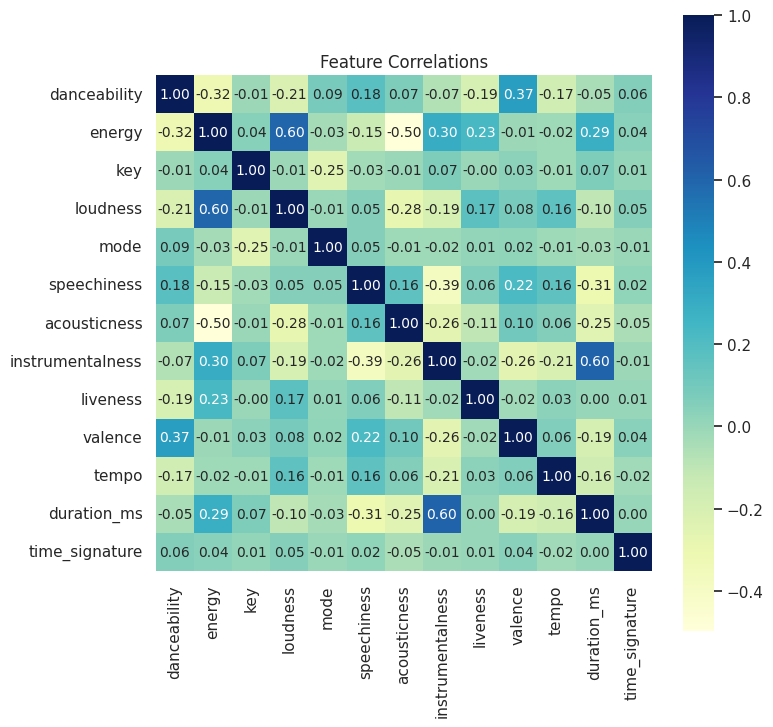

In [ ]:
# inspection for pearson correlations between all features
train_df_corr = train_df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(train_df_corr, annot = True, annot_kws = {'size': 10}, square = True, cmap = 'YlGnBu', fmt = '.2f').set(title = 'Feature Correlations')
plt.show()

Since, there are multiple features and colors, we use another approach to check which features are important.

The better way to do this is by fitting a standard Random Forest Classifier and using the model to identify the important features as it's very good in doing that with its ensembling (bagging) technique and cross-entropy/gini calculations.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fit a standard RFC model

rfc = RandomForestClassifier(random_state = 42, verbose = 1, n_jobs= -1)
rfc.fit(X_train, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.2s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

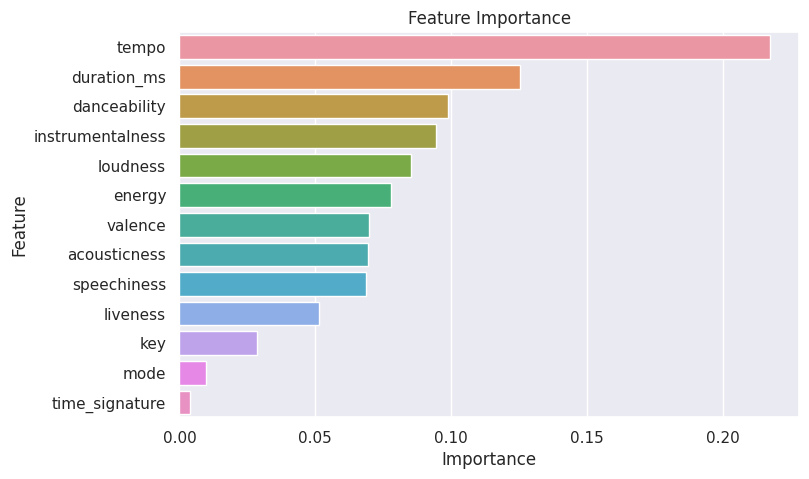

In [ ]:
# Visualizing the amount of contribution that each feature provides to the machine learning model
# Total contribution adds up to 1 which is basically 100%

feature_imp = pd.DataFrame()
feature_imp['Feature'] = train_df.iloc[:, :-1].columns
feature_imp['Importance'] = rfc.feature_importances_

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

sns.barplot(x = 'Importance', y = 'Feature', data = feature_imp).set(title = 'Feature Importance')
plt.show()

#### Feature Selection

In [ ]:
# grabbing only the strong features for our model

good_features = feature_imp.Feature.head(10).values.tolist()
good_features.append('genre')
good_features

['tempo',
 'duration_ms',
 'danceability',
 'instrumentalness',
 'loudness',
 'energy',
 'valence',
 'acousticness',
 'speechiness',
 'liveness',
 'genre']

<ipython-input-59-77096af504d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df[good_features].corr(), annot = True, annot_kws = {'size': 10}, square = True, cmap = 'YlGnBu', fmt = '.2f').set(title = 'Top 10 Strong Feature Correlations')


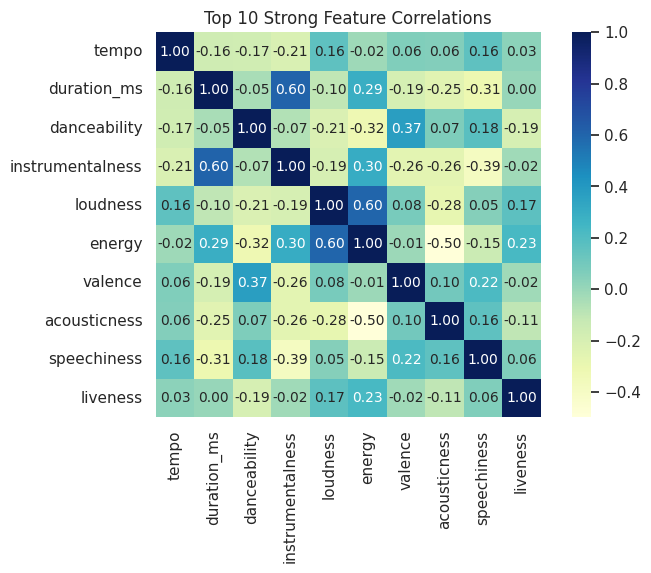

In [ ]:
# now we can inspect the correlations for only the strong features
sns.heatmap(train_df[good_features].corr(), annot = True, annot_kws = {'size': 10}, square = True, cmap = 'YlGnBu', fmt = '.2f').set(title = 'Top 10 Strong Feature Correlations')
plt.show()

In [ ]:
# only selecting the good features for training
train_df = train_df[good_features]
train_df.head()

,tempo,duration_ms,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre
0,149.934,200029,0.474,1.070e-06,-7.370,0.871,0.205,0.015,0.056,0.091,hardstyle
1,173.780,269357,0.686,0.000e+00,-5.573,0.692,0.649,0.482,0.323,0.169,Underground Rap
2,159.296,218933,0.428,1.810e-01,-3.712,0.656,0.355,0.075,0.075,0.150,trap
3,202.082,222442,0.376,0.000e+00,-2.695,0.876,0.250,0.035,0.101,0.125,Dark Trap
4,160.116,213107,0.730,0.000e+00,-4.711,0.790,0.526,0.360,0.167,0.115,Dark Trap


#### Feature Extraction


Since, the values for duration_ms are high and can introduce skewedness, hence converting the milliseconds into minutes.
Thus, we created the column duration_min from duration_ms.

In [ ]:
# before feature extraction - describe duration_ms column
train_df['duration_ms'].describe()

count     33839.000
mean     251207.508
std      103233.156
min       25600.000
25%      180000.000
50%      224800.000
75%      302482.500
max      913052.000
Name: duration_ms, dtype: float64

In [ ]:
# Very high values for duration_ms, can introduce skewedness, hence converting ms into mins
# Creating a column duration_min from duration_ms and dropping duration_ms
train_df['duration_min'] = train_df['duration_ms']/60000
train_df.drop(['duration_ms'], axis = 1, inplace = True)
train_df.head()

<ipython-input-62-97833507634d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['duration_min'] = train_df['duration_ms']/60000
<ipython-input-62-97833507634d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['duration_ms'], axis = 1, inplace = True)


,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre,duration_min
0,149.934,0.474,1.070e-06,-7.370,0.871,0.205,0.015,0.056,0.091,hardstyle,3.334
1,173.780,0.686,0.000e+00,-5.573,0.692,0.649,0.482,0.323,0.169,Underground Rap,4.489
2,159.296,0.428,1.810e-01,-3.712,0.656,0.355,0.075,0.075,0.150,trap,3.649
3,202.082,0.376,0.000e+00,-2.695,0.876,0.250,0.035,0.101,0.125,Dark Trap,3.707
4,160.116,0.730,0.000e+00,-4.711,0.790,0.526,0.360,0.167,0.115,Dark Trap,3.552


In [ ]:
# after feature extraction, describing the duration_min column
train_df['duration_min'].describe()

count    33839.000
mean         4.187
std          1.721
min          0.427
25%          3.000
50%          3.747
75%          5.041
max         15.218
Name: duration_min, dtype: float64

#### Feature Engineering

We know that speechiness can be discretized into 3 sections:
* Value below 0.33 - represents music and other non-speech tracks - considered as 0
* Value between 0.33 and 0.66 - have both music and speech - considered as 1
* Value above 0.66 - tracks with mostly all spoken words - considered as 2

In [ ]:
# Define a function to map speechiness values to categories
def categorize_speechiness(value):
    if value < 0.33:
        return 0  # Music and non-speech
    elif value >= 0.33 and value < 0.66:
        return 1  # Mixed music and speech
    else:
        return 2  # Mostly spoken words

# Apply the function to transform the 'speechiness' column
train_df['speechiness'] = train_df['speechiness'].apply(categorize_speechiness)

This is now a categorical variable, which will be one-hot encoded before starting to train the model.

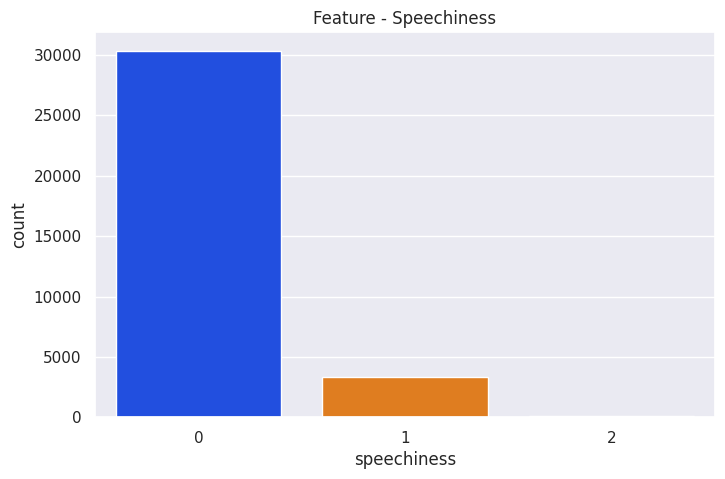

In [ ]:
# plotting the newly obtained categorical values
sns.barplot(x = 'index', y = 'speechiness', data = train_df['speechiness'].value_counts().reset_index(), palette = 'bright').set(xlabel = 'speechiness', ylabel = 'count') 
plt.title('Feature - Speechiness')
plt.show()

In [ ]:
# Analysing the value counts for speechiness
train_df['speechiness'].value_counts().reset_index().rename(columns = {'index':'speechiness','speechiness':'count'})

,speechiness,count
0,0,30369
1,1,3349
2,2,121


### Feature Analysis and Visualisation

In this section, we try to analyse each feature with respect to the genre in depth, specifically for outliers.

In [ ]:
grouped_df = train_df.groupby("genre")

for column in ['duration_min', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']:
  print("============ " + column + " ============")
  grouped_df[column].describe()

============ duration_min ============
============ danceability ============
============ loudness ============
============ speechiness ============
============ acousticness ============
============ instrumentalness ============
============ valence ============
============ tempo ============


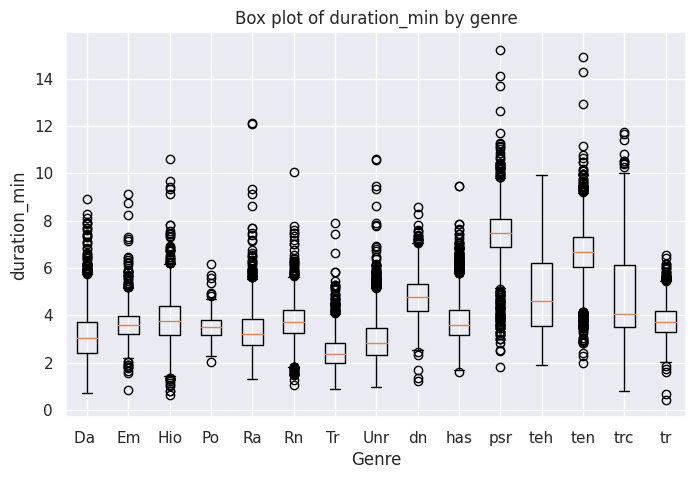

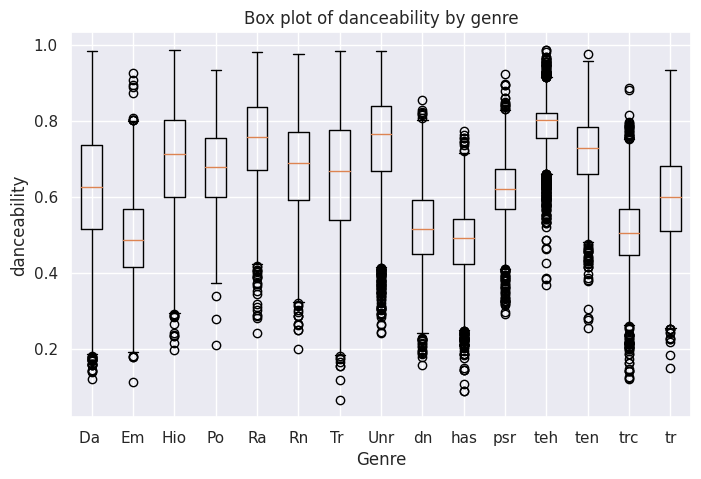

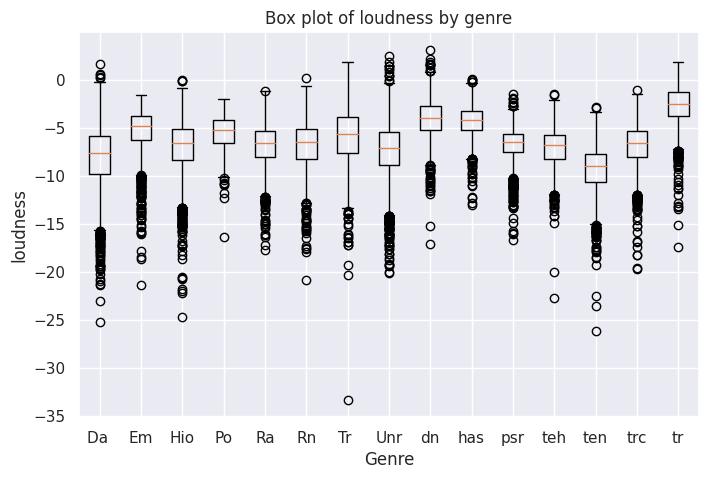

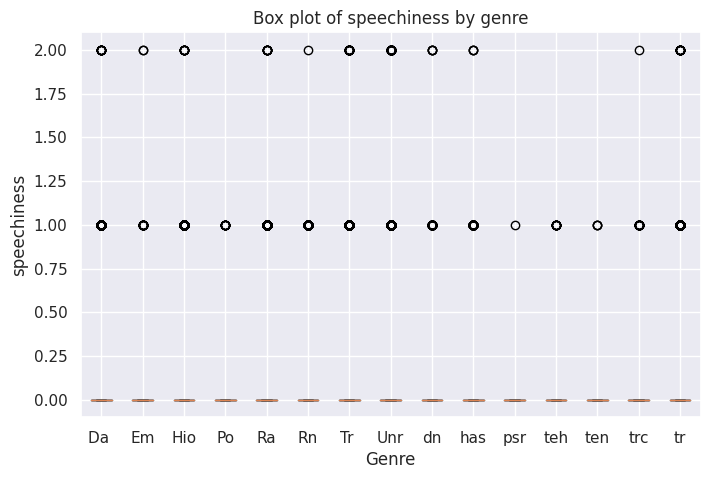

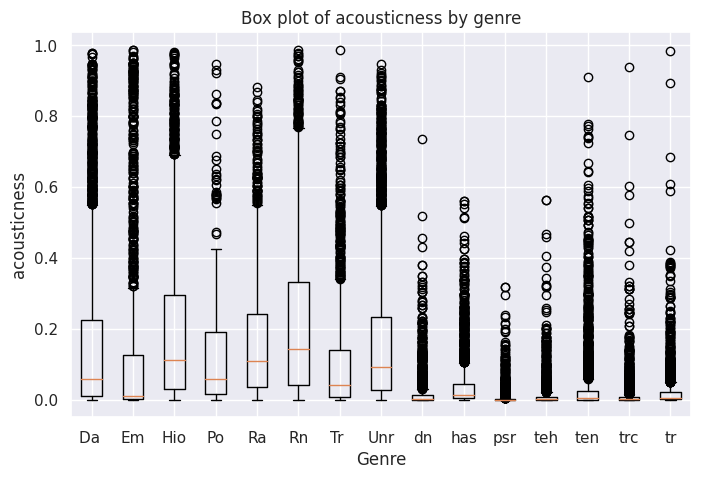

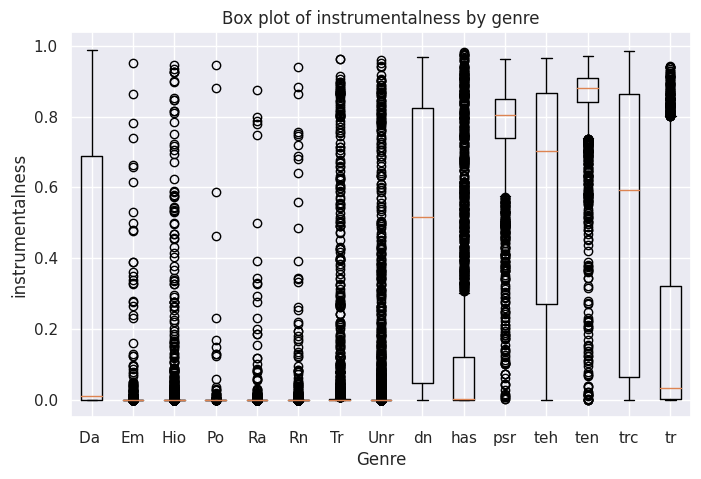

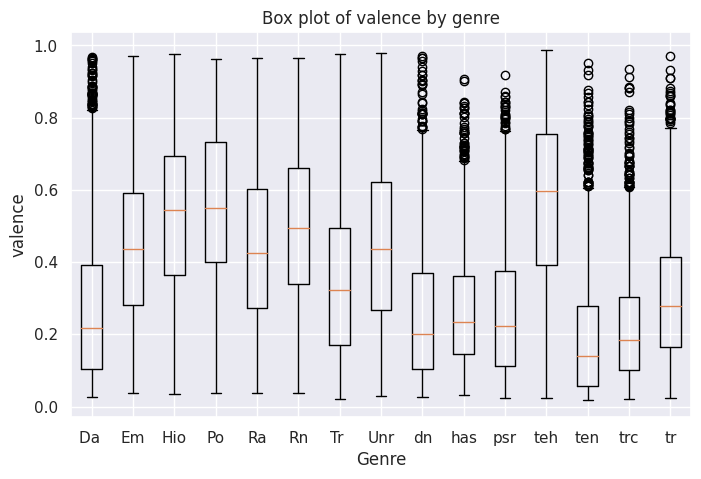

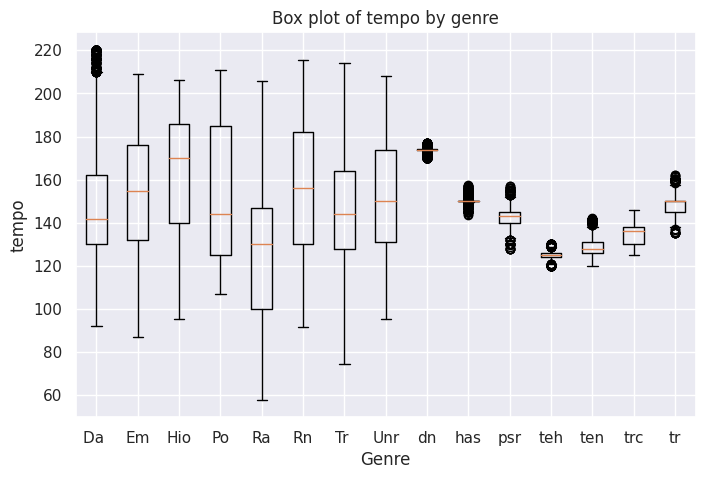

In [ ]:
# Turn off interactive mode
plt.ioff()

# Create box plots for each column
for column in ['duration_min', 'danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']:
    # Create a list of data for each group
    data = [group[column] for _, group in grouped_df]
    
    # Create a figure and axis for the box plot
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create the box plot
    ax.boxplot(data)
    
    # Set the title and labels
    ax.set_title(f'Box plot of {column} by genre')
    ax.set_xlabel('Genre')
    ax.set_ylabel(column)
    
    # Set the x-axis tick labels to the group names
    ax.set_xticklabels([k[0:2] + k[4:5] for k in grouped_df.groups.keys()])
    
# Show the plot
plt.show()

In this section we made a boxplot analysis to describe the data that we have.
Some observations are as follows:
* Although we cannot conclude whether it is outlier or not due the nature of the data, we can see for some features like acousticness, tempo, duration and loudness there is a lot of datapoint fell above Q3 + 1.5*IQR of the boxplot or below Q1 - 1.5 IQR. 
* Additionally we can see that the distribution of each feature between genres is almost similar with each other and thus it may be hard to distinguish between the genres because of that. To create a final analysis catering to the genres, we also will provide a confusion matrix of our result at the end of this report.


After that we will do correlation analysis matrix. We want to see how dependent the feature with each other.

In [ ]:
train_df.corr()

<ipython-input-69-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,duration_min
tempo,1.000,-0.168,-0.207,0.158,-0.017,0.060,0.056,0.097,0.030,-0.159
danceability,-0.168,1.000,-0.066,-0.215,-0.321,0.369,0.068,0.066,-0.195,-0.046
instrumentalness,-0.207,-0.066,1.000,-0.194,0.301,-0.260,-0.263,-0.222,-0.022,0.605
loudness,0.158,-0.215,-0.194,1.000,0.598,0.084,-0.281,0.004,0.166,-0.103
energy,-0.017,-0.321,0.301,0.598,1.000,-0.012,-0.498,-0.104,0.228,0.290
valence,0.060,0.369,-0.260,0.084,-0.012,1.000,0.102,0.111,-0.022,-0.192
acousticness,0.056,0.068,-0.263,-0.281,-0.498,0.102,1.000,0.114,-0.105,-0.249
speechiness,0.097,0.066,-0.222,0.004,-0.104,0.111,0.114,1.000,0.045,-0.187
liveness,0.030,-0.195,-0.022,0.166,0.228,-0.022,-0.105,0.045,1.000,0.003
duration_min,-0.159,-0.046,0.605,-0.103,0.290,-0.192,-0.249,-0.187,0.003,1.000


# 3. Model training and testing

#### Data Duplication

In [ ]:
# checking for fully duplicate values
d = train_df.duplicated(subset = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre', 'duration_min', 'speechiness'])

# creating a feature of is_duplicate
train_df['is_duplicate'] = d

In [ ]:
# checking the total number of real duplicates in the entire training dataset
train_df[(train_df['is_duplicate'] == True)]

,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre,duration_min,is_duplicate
779,174.046,0.588,1.590e-03,-1.779,0.896,0.112,1.520e-03,0,0.072,dnb,4.171,True
882,140.015,0.417,2.950e-01,-5.068,0.980,0.199,3.840e-04,0,0.119,trance,3.659,True
925,125.000,0.786,8.950e-01,-7.677,0.948,0.040,1.790e-03,0,0.109,techno,6.976,True
983,125.005,0.809,7.770e-01,-7.019,0.987,0.651,1.690e-04,0,0.035,techhouse,7.424,True
1255,150.003,0.558,8.870e-03,-4.914,0.873,0.295,1.050e-01,0,0.101,hardstyle,5.121,True
...,...,...,...,...,...,...,...,...,...,...,...,...
33810,150.132,0.462,1.240e-02,-0.632,0.983,0.237,7.950e-05,1,0.221,trap,3.013,True
33817,149.902,0.453,1.260e-03,-3.887,0.953,0.107,2.370e-03,0,0.103,hardstyle,3.200,True
33820,137.976,0.521,2.330e-03,-5.564,0.952,0.134,4.730e-02,0,0.306,trance,3.565,True
33823,173.968,0.519,9.110e-04,-2.823,0.893,0.579,9.750e-04,0,0.067,dnb,4.146,True


In [ ]:
# testing a sample value for full duplication
train_df[(train_df['tempo'] == 174.046) & (train_df['danceability'] == 0.588)]

,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre,duration_min,is_duplicate
766,174.046,0.588,0.002,-1.779,0.896,0.112,0.002,0,0.072,dnb,4.171,False
779,174.046,0.588,0.002,-1.779,0.896,0.112,0.002,0,0.072,dnb,4.171,True
14422,174.046,0.588,0.002,-1.779,0.896,0.112,0.002,0,0.072,dnb,4.171,True
20382,174.046,0.588,0.002,-1.779,0.896,0.112,0.002,0,0.072,dnb,4.171,True
23028,174.046,0.588,0.002,-1.779,0.896,0.112,0.002,0,0.072,dnb,4.171,True
25991,174.046,0.588,0.002,-1.779,0.896,0.112,0.002,0,0.072,dnb,4.171,True


We are dropping duplicates (real duplicates), with every feature to be same (including genre).

In [ ]:
# dropping those duplicate values and the is_duplicate column
train_df = train_df.drop_duplicates(subset = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre', 'duration_min', 'speechiness']).reset_index(drop = True)
train_df = train_df.drop(columns = ['is_duplicate'], axis = 1)

In [ ]:
# checking the shape of the training dataset after dropping the duplicates and the newly created column
train_df.shape

(30989, 11)

It is observed that the train_df had 33839 tuples before dropping duplicates and as correctly understood and implemented after dropping 2850 duplicates, we are left with exactly 30989 tuples.

#### Data Preparation

For preparation, we hot-encode the categorical variables in this section.

##### genre column

In [ ]:
# enumerating the genre into values
target_mapping = {genre: i for i, genre in enumerate(train_df['genre'].unique())}
train_df['genre'] = train_df['genre'].map(target_mapping)

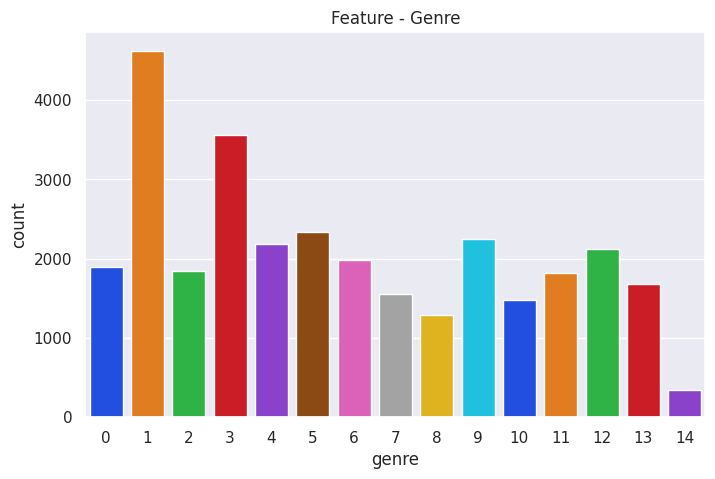

In [ ]:
# plotting the newly obtained categorical value of genre
sns.countplot(x = 'genre', data = train_df, palette = 'bright').set(xlabel = 'genre', ylabel = 'count') 
plt.title('Feature - Genre')
plt.show()

In [ ]:
# Analysing the value counts for speechiness
train_df['genre'].value_counts().reset_index().rename(columns = {'index':'genre','genre':'count'})

,genre,count
0,1,4626
1,3,3565
2,5,2340
3,9,2245
4,4,2192
5,12,2129
6,6,1983
7,0,1896
8,2,1844
9,11,1822


In [ ]:
train_df.head()

,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre,duration_min
0,149.934,0.474,1.070e-06,-7.370,0.871,0.205,0.015,0,0.091,0,3.334
1,173.780,0.686,0.000e+00,-5.573,0.692,0.649,0.482,0,0.169,1,4.489
2,159.296,0.428,1.810e-01,-3.712,0.656,0.355,0.075,0,0.150,2,3.649
3,202.082,0.376,0.000e+00,-2.695,0.876,0.250,0.035,0,0.125,3,3.707
4,160.116,0.730,0.000e+00,-4.711,0.790,0.526,0.360,0,0.115,3,3.552


##### speechiness column

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
train_df['speechiness'] = train_df['speechiness'].astype('category')

# Assigning numerical values and storing it in another columns
train_df['speechiness_cat'] = train_df['speechiness'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(train_df[['speechiness_cat']]).toarray())

# Merge with main
train_df = train_df.join(enc_data)

# Dropping the original and newly created categorical variable
train_df.drop('speechiness', axis=1, inplace=True)
train_df.drop('speechiness_cat', axis=1, inplace=True)

# Rename columns
train_df.columns = ['tempo', 'danceability', 'instrumentalness', 'loudness', 'energy',
                    'valence', 'acousticness', 'liveness', 'genre',
                   'duration_min','speechiness_0','speechiness_1','speechiness_2']

train_df.head()

,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,liveness,genre,duration_min,speechiness_0,speechiness_1,speechiness_2
0,149.934,0.474,1.070e-06,-7.370,0.871,0.205,0.015,0.091,0,3.334,1.0,0.0,0.0
1,173.780,0.686,0.000e+00,-5.573,0.692,0.649,0.482,0.169,1,4.489,1.0,0.0,0.0
2,159.296,0.428,1.810e-01,-3.712,0.656,0.355,0.075,0.150,2,3.649,1.0,0.0,0.0
3,202.082,0.376,0.000e+00,-2.695,0.876,0.250,0.035,0.125,3,3.707,1.0,0.0,0.0
4,160.116,0.730,0.000e+00,-4.711,0.790,0.526,0.360,0.115,3,3.552,1.0,0.0,0.0


##### Transformations for numerical columns

We tried and tested boxcox and logarithmic transformations for numerical features that appeared skewed and close to Gaussian, but the model performance didn't improve significantly. Thus, we have not included in the code as well as the report.

In [ ]:
# Tested boxcox and logarithmic transformations here for the skewed numerical features
# fitted_data = np.log(train_df['valence'])
# train_df['valence'] = fitted_data
# test_df['valence'] = np.log(test_df['valence'])

# sns.histplot(fitted_data)
# plt.title('Feature - Valence')

# fitted_data, fitted_lambda = stats.boxcox(train_df['valence'])
# train_df['valence'] = fitted_data
# test_df['valence'] = stats.boxcox(test_df['valence'], fitted_lambda)

# sns.histplot(fitted_data)
# plt.title('Feature - Valence')

#### Testing preparation

Applying all training dataset based transformations to the test dataset.

* Drop columns - key, mode, time_signature after using the results from feature importance
* Extracting duration_min and dropping duration_ms
* Convert speechiness into categories
* One-hot encode speechiness
* Encode y_test genres
* Use min-max scaler to scale the values 

In [ ]:
# only selecting the good features for training
test_df = test_df[good_features]
test_df.head(2)

,tempo,duration_ms,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre
0,150.152,224400,0.379,0.000,-6.316,0.837,0.567,0.021,0.256,0.079,hardstyle
1,150.039,340204,0.555,0.152,-7.179,0.856,0.427,0.002,0.095,0.067,hardstyle


In [ ]:
# Creating a column duration_min from duration_ms and dropping duration_ms
test_df['duration_min'] = test_df['duration_ms']/60000
test_df.drop(['duration_ms'], axis = 1, inplace = True)
test_df.head()

<ipython-input-82-ca76b563ed13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['duration_min'] = test_df['duration_ms']/60000
<ipython-input-82-ca76b563ed13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['duration_ms'], axis = 1, inplace = True)


,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre,duration_min
0,150.152,0.379,0.000e+00,-6.316,0.837,0.567,0.021,0.256,0.079,hardstyle,3.740
1,150.039,0.555,1.520e-01,-7.179,0.856,0.427,0.002,0.095,0.067,hardstyle,5.670
2,184.472,0.852,0.000e+00,-10.491,0.653,0.821,0.171,0.269,0.079,Underground Rap,5.446
3,150.057,0.568,3.480e-04,-4.352,0.901,0.331,0.008,0.076,0.185,hardstyle,3.200
4,126.050,0.897,6.470e-03,-10.225,0.582,0.804,0.011,0.110,0.049,techhouse,3.119


In [ ]:
# Apply the function to transform the 'speechiness' column
test_df['speechiness'] = test_df['speechiness'].apply(categorize_speechiness)

<ipython-input-83-83f0496d534a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['speechiness'] = test_df['speechiness'].apply(categorize_speechiness)


In [ ]:
# Enumerating the genre into values
test_df['genre'] = test_df['genre'].map(target_mapping)

In [ ]:
test_df.head()

,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,speechiness,liveness,genre,duration_min
0,150.152,0.379,0.000e+00,-6.316,0.837,0.567,0.021,0,0.079,0,3.740
1,150.039,0.555,1.520e-01,-7.179,0.856,0.427,0.002,0,0.067,0,5.670
2,184.472,0.852,0.000e+00,-10.491,0.653,0.821,0.171,0,0.079,1,5.446
3,150.057,0.568,3.480e-04,-4.352,0.901,0.331,0.008,0,0.185,0,3.200
4,126.050,0.897,6.470e-03,-10.225,0.582,0.804,0.011,0,0.049,11,3.119


In [ ]:
# Converting type of columns to category
test_df['speechiness'] = test_df['speechiness'].astype('category')

# Assigning numerical values and storing it in another columns
test_df['speechiness_cat'] = test_df['speechiness'].cat.codes

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(test_df[['speechiness_cat']]).toarray())

# Merge with main
test_df = test_df.join(enc_data)

# Dropping the original and newly created categorical variable
test_df.drop('speechiness', axis=1, inplace=True)
test_df.drop('speechiness_cat', axis=1, inplace=True)

# Rename columns
test_df.columns = ['tempo', 'danceability', 'instrumentalness', 'loudness', 'energy',
                    'valence', 'acousticness', 'liveness', 'genre',
                      'duration_min','speechiness_0','speechiness_1','speechiness_2']

test_df.head()

,tempo,danceability,instrumentalness,loudness,energy,valence,acousticness,liveness,genre,duration_min,speechiness_0,speechiness_1,speechiness_2
0,150.152,0.379,0.000e+00,-6.316,0.837,0.567,0.021,0.079,0,3.740,1.0,0.0,0.0
1,150.039,0.555,1.520e-01,-7.179,0.856,0.427,0.002,0.067,0,5.670,1.0,0.0,0.0
2,184.472,0.852,0.000e+00,-10.491,0.653,0.821,0.171,0.079,1,5.446,1.0,0.0,0.0
3,150.057,0.568,3.480e-04,-4.352,0.901,0.331,0.008,0.185,0,3.200,1.0,0.0,0.0
4,126.050,0.897,6.470e-03,-10.225,0.582,0.804,0.011,0.049,11,3.119,1.0,0.0,0.0


#### Data Scaling

Our variables are showing different ranges, we are going to scale them because we don't want this to interfere with our models' performance. We have implemented the scaling process as differently for the training and the test set; this is to make things compatible with the fact that we cannot use information from the test set to do the scaling.

Since, for our data, tempo and duration_min show varying ranges (unlike other features) and are gaussian in nature (as discussed before), we apply standard scaler to them.

In [ ]:
std = StandardScaler().fit(train_df[['tempo']])
train_df['tempo'] = std.transform(train_df[['tempo']])
test_df['tempo'] = std.transform(test_df[['tempo']])

std = StandardScaler().fit(train_df[['duration_min']])
train_df['duration_min'] = std.transform(train_df[['duration_min']])
test_df['duration_min'] = std.transform(test_df[['duration_min']])

In [ ]:
# Setting the X_train and y_train to preprocess values

X_train = train_df.loc[:,(train_df.columns != 'genre')]
y_train = train_df['genre']

In [ ]:
# Setting the X_test and y_test to preprocessed values

X_test = test_df.loc[:,(test_df.columns != 'genre')]
y_test = test_df['genre']

### Upsampling

Since, for some classes, the distribution wasn't proper, upsampling is performed and all the classes have equal distribution.

Class=0, n=4626 (10.936%)
Class=1, n=4626 (10.936%)
Class=2, n=4626 (10.936%)
Class=3, n=4626 (10.936%)
Class=4, n=4626 (10.936%)
Class=5, n=4626 (10.936%)
Class=6, n=4626 (10.936%)
Class=7, n=4626 (10.936%)
Class=8, n=4626 (10.936%)
Class=9, n=4626 (10.936%)
Class=10, n=4626 (10.936%)
Class=11, n=4626 (10.936%)
Class=12, n=4626 (10.936%)
Class=13, n=4626 (10.936%)
Class=14, n=4626 (10.936%)


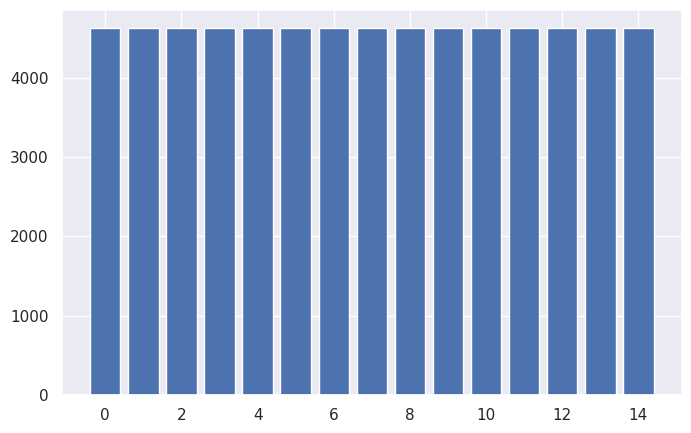

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# 4. Model Implementations

Due to limited GPU on our systems as well as on Google Collaboratory, we tried couldn't successfully run the hyperparameter tuning. Hence, we have used the following algorithms with mostly chosen parameters.
* Decision Tree Classifier
* Random Forest Classifier
* XGBoost
* KNeighbors Classifier
* Logistic Regression
* Quadratic Discriminant Analysis (QDA)

In [ ]:
# creating a dataframe to store the results
results_df = pd.DataFrame(index=[], columns= ['Training F1 Macro','Testing F1 Macro'])

In [ ]:
# Pick the best model based on score from a cross val
def get_best_model(cv_res):
  best_model = None
  max_score = -9999999999999

  for i in range(len(cv_res['estimator'])):
    curr_score = cv_res['estimator'][i].score(X_test, y_test)
    if curr_score > max_score:
      max_score = curr_score
      best_model = cv_res['estimator'][i]
  
  return best_model

In [ ]:
# finding optimal hyperparameters through grid search cv and f1_macro for the scoring
def find_optimal_params(model, param_grid):
    my_score = make_scorer(f1_score, average = 'macro')
    gs_cv = GridSearchCV(model, param_grid, scoring = my_score, n_jobs= -1, verbose = 1, cv = 5)
    gs_cv.fit(X_train, y_train.ravel())
    optimal_param = gs_cv.best_params_
    best_model = gs_cv.best_estimator_
    val_score = gs_cv.best_score_
    return best_model, optimal_param, val_score

### Decision Tree Classifier

In [ ]:
# running the decision tree classifier
clf = DecisionTreeClassifier(max_depth = 10, min_samples_split = 10, random_state = 42)

# do cross val
cv_res = cross_validate(clf, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
best_model = get_best_model(cv_res)

y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.6469151792239983
Test F1 Score is 0.5566641298452514


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['Decision Tree',:] = scores
results_df

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557


### Random Forest Classifier

In [ ]:
# running the random forest classifier
clf = RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 750, n_jobs = -1, random_state = 42)

# do cross val
cv_res = cross_validate(clf, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
best_model = get_best_model(cv_res)

y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.7126432778068611
Test F1 Score is 0.6089812031621433


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['Random Forest Classifier',:] = scores
results_df

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609


### XGBoost

#### With hyper-parameter tuning

In [ ]:
from xgboost import XGBClassifier

#Finding optimal hyperparameters for XGBoost

xgb = XGBClassifier(booster = 'gbtree', tree_method = 'gpu_hist', random_state = 42, verbosity = 1,
                    objective='multi:softprob', num_class = 15)

xgb_param_grid = {
    'learning_rate': [0.6, 0.7, 0.8],
    'gamma': [0, 0.01],
    'max_depth': np.arange(2, 10, 2).astype(int)
}

xgb_model, xgb_best_params, xgb_val_score = find_optimal_params(xgb, xgb_param_grid)

print('\nRandom Forest - Optimal hyperparameters:')
print(xgb_best_params)

print(f'\nValidation (f1-score): {xgb_val_score}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Random Forest - Optimal hyperparameters:
{'gamma': 0.01, 'learning_rate': 0.6, 'max_depth': 8}

Validation (f1-score): 0.7921900485407447


In [ ]:
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

scores = []

print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['XGBoost - HP Tuning',:] = scores
results_df

Train F1 Score is 0.9699210737094943
Test F1 Score is 0.6169146386552219


,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609
XGBoost - HP Tuning,0.97,0.617


#### With default hyperparameters

In [ ]:
# running the xgboost
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=2,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=0.001, scale_pos_weight=100, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

cv_res = cross_validate(clf, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
xgb_best = get_best_model(cv_res)

y_train_pred = xgb_best.predict(X_train)
y_pred = xgb_best.predict(X_test)

[17:36:39] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:39:26] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:42:12] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:44:40] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[17:47:05] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.7310845801350275
Test F1 Score is 0.6316618317721926


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['XGBoost',:] = scores
results_df

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609
XGBoost - HP Tuning,0.97,0.617
XGBoost,0.731,0.632


### KNeighbours Classifier

In [ ]:
# running the knn classifier
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski')
cv_res = cross_validate(knn, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
best_model = get_best_model(cv_res)

y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.7192270970836839
Test F1 Score is 0.5322988178349531


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['KNN',:] = scores
results_df

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609
XGBoost - HP Tuning,0.97,0.617
XGBoost,0.731,0.632
KNN,0.719,0.532


### Gaussian Naive Bayes

In [ ]:
# running the gaussian naive bayes classifier
gaussian_nb = GaussianNB()
cv_res = cross_validate(gaussian_nb, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
best_model = get_best_model(cv_res)

y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.39399196659416463
Test F1 Score is 0.3750673603676675


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['Gaussian Naive Bayes',:] = scores
results_df

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609
XGBoost - HP Tuning,0.97,0.617
XGBoost,0.731,0.632
KNN,0.719,0.532
Gaussian Naive Bayes,0.394,0.375


### Logistic Regression

In [ ]:
# running the logistic regression
logreg = LogisticRegressionCV(Cs = 20, random_state = 42, cv = 5, scoring = 'f1_macro', multi_class = 'multinomial')

cv_res = cross_validate(logreg, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
best_model = get_best_model(cv_res)

y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.5576244070273634
Test F1 Score is 0.5131973586032982


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['Logistic Regression',:] = scores
results_df

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609
XGBoost - HP Tuning,0.97,0.617
XGBoost,0.731,0.632
KNN,0.719,0.532
Gaussian Naive Bayes,0.394,0.375
Logistic Regression,0.558,0.513


### QDA

In [ ]:
# running the qda algorithm
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
cv_res = cross_validate(qda, X_train, y_train, cv = 5, scoring="f1_macro", return_estimator=True)
best_model = get_best_model(cv_res)

y_train_pred = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
print('Train F1 Score is {0}'.format(f1_score(y_train, y_train_pred, average = 'macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test, y_pred, average = 'macro')))

Train F1 Score is 0.5024121667242337
Test F1 Score is 0.46696244508242646


In [ ]:
scores = []

train_f1 = f1_score(y_train, y_train_pred, average = 'macro')
test_f1 = f1_score(y_test, y_pred, average = 'macro')
scores.append(train_f1)
scores.append(test_f1)

results_df.loc['QDA',:] = scores
results_df 

,Training F1 Macro,Testing F1 Macro
Decision Tree,0.647,0.557
Random Forest Classifier,0.713,0.609
XGBoost - HP Tuning,0.97,0.617
XGBoost,0.731,0.632
KNN,0.719,0.532
Gaussian Naive Bayes,0.394,0.375
Logistic Regression,0.558,0.513
QDA,0.502,0.467


Some key observations:

* The best F1 score obtained is 63 with XGBoost model. The features are not having a specific pattern to achieve good F1 score. They are falling under different distributions which is complex for the machine learning model to learn from them. 
* If more further more feature engineering techniques may help to get better prediction results.
* There is not much significant gap between the training and testing f1 macro scores for our models, which indicates that our models are able to generalize better to the training data and they perform better on unseen data, i.e., robust in nature. 
* Also, the models of Gaussian Naive Bayes, Logistic Regression and QDA perform much worse than other models used.

### Result Analysis

In [ ]:
# Support function for confusion matrix
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [ ]:
y_preds = pd.Series(y_pred)

reversed_mapping = {value: key for key, value in target_mapping.items()}
confusion(y_test.apply(lambda x: reversed_mapping[x]), y_preds.apply(lambda x: reversed_mapping[x]))

predicted,Dark Trap,Emo,Hiphop,Pop,Rap,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
target,,,,,,,,,,,,,,,
Dark Trap,211,34,10,131,54,39,99,87,16,84,0,55,25,113,12
Emo,10,84,4,125,4,17,1,5,22,54,0,5,2,3,5
Hiphop,29,19,107,204,44,69,18,50,43,19,2,19,0,12,5
Pop,1,11,2,79,6,5,0,1,1,1,1,4,0,0,0
Rap,14,5,10,115,112,18,18,20,3,12,0,14,0,6,0
RnB,15,19,28,158,25,65,10,12,14,11,1,17,0,3,2
Trap Metal,22,14,5,50,32,4,144,28,7,27,0,5,1,8,21
Underground Rap,79,23,59,324,143,58,174,208,16,35,1,39,0,11,15
dnb,2,3,6,8,0,5,0,0,561,0,0,0,0,0,2
